# Battle of Neighbourhoods in Edmonton

###  Import libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import requests

### Calculate the Average Housing Value of Each Neighbourhood in Edmonton

###### Prepare the Edmonton Residential Property Data

In [3]:
# The dataset was obtained from City of Edmonton's Open Data Portal. 
# The acccess to dataset is limit via developer portal, so dataset was downloaded to local.
path = "T:\Edmonton\Property_Assessment_Data__Current_Calendar_Year_.csv"
Ed_hp = pd.read_csv(path)
Ed_hp.head()

,Account Number,Suite,House Number,Street Name,Assessed Value,Assessment Class,Neighbourhood ID,Neighbourhood,Ward,Garage,Latitude,Longitude
0,8392904,NaN,9035.0,90 STREET NW,352500,Residential,6040.0,BONNIE DOON,Ward 8,Y,53.526362,-113.464935
1,10063906,NaN,1535.0,37B AVENUE NW,382500,Residential,6443.0,TAMARACK,Ward 11,Y,53.473516,-113.366455
2,4252557,NaN,8409.0,156 AVENUE NW,348000,Residential,2050.0,BELLE RIVE,Ward 3,Y,53.616207,-113.472303
3,10512253,NaN,7046.0,NEWSON ROAD NW,168000,Residential,3111.0,GRIESBACH,Ward 2,N,53.608989,-113.513399
4,8855603,NaN,7112.0,82 STREET NW,370500,Residential,6020.0,AVONMORE,Ward 11,Y,53.507129,-113.453902


In [4]:
# Check the number of missing values in Dataframe
print('Columns: Number of missing values')
print(Ed_hp.isnull().sum(axis=0))

Columns: Number of missing values
Account Number           0
Suite               326373
House Number         43686
Street Name          43686
Assessed Value           0
Assessment Class         0
Neighbourhood ID         1
Neighbourhood            1
Ward                     1
Garage                   0
Latitude                 0
Longitude                0
dtype: int64


In [5]:
# Drop the row and columns that won't be useful for following Calcualtions
Ed_hp_drop1 = Ed_hp.drop(['Account Number', 'Suite', 'House Number', 'Street Name', 'Neighbourhood ID', 'Ward', 'Garage'], axis = 1)
Ed_hp_drop = Ed_hp_drop1.dropna(axis = 0)
Ed_hp_drop

,Assessed Value,Assessment Class,Neighbourhood,Latitude,Longitude
0,352500,Residential,BONNIE DOON,53.526362,-113.464935
1,382500,Residential,TAMARACK,53.473516,-113.366455
2,348000,Residential,BELLE RIVE,53.616207,-113.472303
3,168000,Residential,GRIESBACH,53.608989,-113.513399
4,370500,Residential,AVONMORE,53.507129,-113.453902
...,...,...,...,...,...
406393,2407500,Non Residential,KILDARE,53.600314,-113.444029
406394,143500,Residential,CAVANAGH,53.412248,-113.514570
406395,169000,Residential,CAVANAGH,53.411482,-113.514534
406396,182500,Residential,GLENRIDDING RAVINE,53.404557,-113.603708


In [6]:
# Check wether there are still ming values in Dataframe
print('Columns: Number of missing values')
print(Ed_hp_drop.isnull().sum(axis=0))

Columns: Number of missing values
Assessed Value      0
Assessment Class    0
Neighbourhood       0
Latitude            0
Longitude           0
dtype: int64


In [7]:
# Remove non-residential properties from dataframe
Ed_residential1 = Ed_hp_drop[~Ed_hp_drop['Assessment Class'].str.contains('Non Residential')]
Ed_residential2 = Ed_residential1[~Ed_residential1['Assessment Class'].str.contains('Other Residential')]
Ed_residential = Ed_residential2[~Ed_residential2['Neighbourhood'].str.contains('RIVER VALLEY')]
Ed_residential

,Assessed Value,Assessment Class,Neighbourhood,Latitude,Longitude
0,352500,Residential,BONNIE DOON,53.526362,-113.464935
1,382500,Residential,TAMARACK,53.473516,-113.366455
2,348000,Residential,BELLE RIVE,53.616207,-113.472303
3,168000,Residential,GRIESBACH,53.608989,-113.513399
4,370500,Residential,AVONMORE,53.507129,-113.453902
...,...,...,...,...,...
406386,47000,Residential,STILLWATER,53.448469,-113.673083
406391,130000,Residential,GLENRIDDING RAVINE,53.407443,-113.604866
406394,143500,Residential,CAVANAGH,53.412248,-113.514570
406395,169000,Residential,CAVANAGH,53.411482,-113.514534


###### Average Value of the Residential Properties in Edmonton Neighbourhoods

In [8]:
# To get the average housing value of each neighbourhood
Ed_residential_average = Ed_residential.groupby(['Neighbourhood'],as_index=False).mean()
Ed_residential_average

,Neighbourhood,Assessed Value,Latitude,Longitude
0,ABBOTTSFIELD,143401.595745,53.575190,-113.390273
1,ALBANY,190122.781065,53.629753,-113.555685
2,ALBERTA AVENUE,225147.732181,53.568443,-113.485034
3,ALDERGROVE,299914.527239,53.516685,-113.640781
4,ALLARD,339807.399723,53.400668,-113.529375
...,...,...,...,...
333,WINTERBURN INDUSTRIAL AREA EAST,546437.500000,53.554659,-113.670547
334,WINTERBURN INDUSTRIAL AREA WEST,372642.857143,53.550553,-113.704610
335,WOODCROFT,291344.702467,53.567072,-113.557124
336,YELLOWHEAD CORRIDOR EAST,801500.000000,53.583890,-113.453337


In [9]:
# check the value types of new dataframe
Ed_residential_average.dtypes

Neighbourhood      object
Assessed Value    float64
Latitude          float64
Longitude         float64
dtype: object

In [10]:
Ed_housing = Ed_residential_average.sort_values(by = ["Assessed Value"], ascending = False)
Ed_housing.head()

,Neighbourhood,Assessed Value,Latitude,Longitude
331,WINDERMERE AREA,2.298667e+06,53.404547,-113.633278
269,RURAL WEST BIG LAKE,1.903969e+06,53.579649,-113.679650
174,KINGLET GARDENS,1.141950e+06,53.574931,-113.705782
320,WESTBROOK ESTATES,1.122334e+06,53.469766,-113.548718
215,MILL CREEK RAVINE NORTH,1.082500e+06,53.523396,-113.476045


In [11]:
# To get a neighbourhood dataframe with top100 housing value
Ed_house100 = Ed_housing[0:100]
Ed_house100

,Neighbourhood,Assessed Value,Latitude,Longitude
331,WINDERMERE AREA,2.298667e+06,53.404547,-113.633278
269,RURAL WEST BIG LAKE,1.903969e+06,53.579649,-113.679650
174,KINGLET GARDENS,1.141950e+06,53.574931,-113.705782
320,WESTBROOK ESTATES,1.122334e+06,53.469766,-113.548718
215,MILL CREEK RAVINE NORTH,1.082500e+06,53.523396,-113.476045
...,...,...,...,...
301,TERWILLEGAR TOWNE,4.011433e+05,53.449461,-113.578558
113,ELSINORE,3.982096e+05,53.640864,-113.499286
136,GREENFIELD,3.949347e+05,53.471420,-113.527905
251,RAPPERSWILL,3.918725e+05,53.634517,-113.533297


In [12]:
Ed_house100.shape

(100, 4)

### Total Number of Crimes In Each Neighbourhood

###### Prepare Data for Further Analysis

In [13]:
# The dataset was obtained from the Open Data Portal of Edmonton Police Service.
# The acccess to dataset is limit via developer portal, so dataset was downloaded to local.
path = "T:\Edmonton\EPS_Neighbourhood_Criminal_Occurrences.csv"
Ed_cr = pd.read_csv(path)
Ed_cr_sorted = Ed_cr.sort_values(by = 'Occurrence Reported Year', ascending = False)
Ed_cr_sorted.head()

,Neighbourhood Description (Occurrence),Occurrence Violation Type Group,Occurrence Reported Year,Occurrence Reported Quarter,Occurrence Reported Month,# Occurrences
113076,YOUNGSTOWN INDUSTRIAL,Theft Over $5000,2019,Q3,7,1
88000,PRINCE CHARLES,Theft From Vehicle,2019,Q2,5,4
88026,QUEEN ALEXANDRA,Theft From Vehicle,2019,Q2,5,13
88025,QUEEN ALEXANDRA,Theft From Vehicle,2019,Q2,4,12
88024,QUEEN ALEXANDRA,Theft From Vehicle,2019,Q1,3,13


In [14]:
# Drop columns "Occurrence Reported Quarter", "Occurrence Reported Month", and "Occurrence Reported Year"
Ed_cr_drop = Ed_cr_sorted.drop(['Occurrence Reported Quarter', 'Occurrence Reported Month', 'Occurrence Reported Year'], axis =1)
Ed_cr_drop.head()

,Neighbourhood Description (Occurrence),Occurrence Violation Type Group,# Occurrences
113076,YOUNGSTOWN INDUSTRIAL,Theft Over $5000,1
88000,PRINCE CHARLES,Theft From Vehicle,4
88026,QUEEN ALEXANDRA,Theft From Vehicle,13
88025,QUEEN ALEXANDRA,Theft From Vehicle,12
88024,QUEEN ALEXANDRA,Theft From Vehicle,13


In [15]:
# Calculate the total crimes occured in each neighbourhood from 2009 and 2019
Ed_cr_group = Ed_cr_drop.groupby(['Neighbourhood Description (Occurrence)'],as_index=False).sum()
Ed_cr_group

,Neighbourhood Description (Occurrence),# Occurrences
0,ABBOTTSFIELD,976
1,ALBANY,221
2,ALBERTA AVENUE,5048
3,ALBERTA PARK INDUSTRIAL,260
4,ALDERGROVE,937
...,...,...
388,WOODCROFT,1334
389,YELLOWHEAD CORRIDOR EAST,808
390,YELLOWHEAD CORRIDOR WEST,51
391,YORK,1129


In [16]:
# Rename dataframe coloumns
Ed_crimes = Ed_cr_group.rename(columns={'Neighbourhood Description (Occurrence)':'Neighbourhood','# Occurrences':'Total Crimes'})
Ed_crimes

,Neighbourhood,Total Crimes
0,ABBOTTSFIELD,976
1,ALBANY,221
2,ALBERTA AVENUE,5048
3,ALBERTA PARK INDUSTRIAL,260
4,ALDERGROVE,937
...,...,...
388,WOODCROFT,1334
389,YELLOWHEAD CORRIDOR EAST,808
390,YELLOWHEAD CORRIDOR WEST,51
391,YORK,1129


In [17]:
# Remove the crime data of non-residential area
Ed_crimes_residential1 = Ed_crimes[~Ed_crimes['Neighbourhood'].str.contains('INDUSTRIAL')]
Ed_crimes_residential2 = Ed_crimes_residential1[~Ed_crimes_residential1['Neighbourhood'].str.contains('Not Entered')]
Ed_crimes_residential = Ed_crimes_residential2[~Ed_crimes_residential2['Neighbourhood'].str.contains('BUSINESS PARK')]
Ed_crimes_residential

,Neighbourhood,Total Crimes
0,ABBOTTSFIELD,976
1,ALBANY,221
2,ALBERTA AVENUE,5048
4,ALDERGROVE,937
5,ALLARD,263
...,...,...
385,WINDSOR PARK,311
388,WOODCROFT,1334
389,YELLOWHEAD CORRIDOR EAST,808
390,YELLOWHEAD CORRIDOR WEST,51


In [18]:
# Get the neighhood ranking by crime occurences in descending order
Ed_crimes_descending = Ed_crimes_residential.sort_values(by = 'Total Crimes', ascending = False)
Ed_crimes_descending.head()

,Neighbourhood,Total Crimes
107,DOWNTOWN,11741
253,OLIVER,6445
222,MCCAULEY,5964
77,CENTRAL MCDOUGALL,5489
50,BOYLE STREET,5224


In [19]:
# Get the neighhood ranking by crime occurences in ascending order
Ed_crimes_ascending = Ed_crimes_residential.sort_values(by = 'Total Crimes')
Ed_crimes_ascending.head(50)

,Neighbourhood,Total Crimes
317,RURAL NORTH WEST,1
11,ANTHONY HENDAY CLAREVIEW,1
287,RIVER VALLEY CAMERON,1
82,CLAREVIEW CAMPUS,2
10,ANTHONY HENDAY CASTLEDOWNS,2
89,CPR WEST,2
14,ANTHONY HENDAY LAKE DISTRICT,4
15,ANTHONY HENDAY MISTATIM,4
45,BLACKMUD CREEK RAVINE,4
384,WINDERMERE AREA,5


In [20]:
# To get a dataframe of neighboods with the lowest number of crimes between 2009 - 2019
Ed_crimelow100 = Ed_crimes_ascending[0:100]
Ed_crimelow100 

,Neighbourhood,Total Crimes
317,RURAL NORTH WEST,1
11,ANTHONY HENDAY CLAREVIEW,1
287,RIVER VALLEY CAMERON,1
82,CLAREVIEW CAMPUS,2
10,ANTHONY HENDAY CASTLEDOWNS,2
...,...,...
57,BULYEA HEIGHTS,192
47,BLUE QUILL ESTATES,193
270,POTTER GREENS,193
281,RHATIGAN RIDGE,194


### Get the Neighbourhood Dataframe With Great Property Values and Low Crime Rate

In [21]:
# Get a dataframe with same neighbourhoods from Ed_house100 and Ed_crimelow100
Edmonton_data100 = pd.merge(Ed_house100, Ed_crimelow100, on = 'Neighbourhood' )
df = Edmonton_data100
df.head()

,Neighbourhood,Assessed Value,Latitude,Longitude,Total Crimes
0,WINDERMERE AREA,2.298667e+06,53.404547,-113.633278,5
1,RURAL WEST BIG LAKE,1.903969e+06,53.579649,-113.679650,58
2,WESTBROOK ESTATES,1.122334e+06,53.469766,-113.548718,185
3,MILL CREEK RAVINE NORTH,1.082500e+06,53.523396,-113.476045,51
4,ASTER,1.047361e+06,53.450061,-113.355385,9


In [22]:
# Drop 'Latitude', 'Longitude' columns
df = Edmonton_data100.drop(['Latitude', 'Longitude'], axis = 1)
df

,Neighbourhood,Assessed Value,Total Crimes
0,WINDERMERE AREA,2.298667e+06,5
1,RURAL WEST BIG LAKE,1.903969e+06,58
2,WESTBROOK ESTATES,1.122334e+06,185
3,MILL CREEK RAVINE NORTH,1.082500e+06,51
4,ASTER,1.047361e+06,9
5,ANTHONY HENDAY RAMPART,1.010370e+06,131
6,WHITEMUD CREEK RAVINE NORTH,9.767500e+05,24
7,WHITEMUD CREEK RAVINE SOUTH,9.693958e+05,8
8,UNIVERSITY OF ALBERTA FARM,9.693333e+05,139
9,QUESNELL HEIGHTS,8.881579e+05,42


In [23]:
# Shape of dataframe
df.shape

(42, 3)

In [24]:
# Data type in df
df.dtypes

Neighbourhood      object
Assessed Value    float64
Total Crimes        int64
dtype: object

In [25]:
# Replace (original value) by (original value)/(maximum value)
df['Assessed Value'] = df['Assessed Value']/df['Assessed Value'].max()
df['Total Crimes'] = df['Total Crimes']/df['Total Crimes'].max()
df

,Neighbourhood,Assessed Value,Total Crimes
0,WINDERMERE AREA,1.000000,0.025773
1,RURAL WEST BIG LAKE,0.828293,0.298969
2,WESTBROOK ESTATES,0.488254,0.953608
3,MILL CREEK RAVINE NORTH,0.470925,0.262887
4,ASTER,0.455639,0.046392
5,ANTHONY HENDAY RAMPART,0.439546,0.675258
6,WHITEMUD CREEK RAVINE NORTH,0.424920,0.123711
7,WHITEMUD CREEK RAVINE SOUTH,0.421721,0.041237
8,UNIVERSITY OF ALBERTA FARM,0.421694,0.716495
9,QUESNELL HEIGHTS,0.386380,0.216495


###### Ranking of Selected Neighbourhoods In Ascending Order of Crimes

In [26]:
# Number of crimes of selected neighbourhoods
Edmonton_SelectedNeigh_crime = Edmonton_data100.drop(['Assessed Value','Latitude', 'Longitude'], axis = 1)
Edmonton_SelectedNeigh_crime.head()

,Neighbourhood,Total Crimes
0,WINDERMERE AREA,5
1,RURAL WEST BIG LAKE,58
2,WESTBROOK ESTATES,185
3,MILL CREEK RAVINE NORTH,51
4,ASTER,9


In [27]:
# Neighbourhood ranking in ascending order of crimes
Edmonton_SelectedNeighbood_crimerank = Edmonton_SelectedNeigh_crime.sort_values(by = ["Total Crimes"])
Edmonton_SelectedNeighbood_crimerank.head()

,Neighbourhood,Total Crimes
19,BLACKMUD CREEK RAVINE,4
22,ANTHONY HENDAY LAKE DISTRICT,4
0,WINDERMERE AREA,5
7,WHITEMUD CREEK RAVINE SOUTH,8
4,ASTER,9


###### Ranking of Selected Neighbourhoods In Ascending Order of Housing Value

In [28]:
# Assessed values of selected neighbourhoods
Edmonton_SelectedNeigh_propertyvalue = Edmonton_data100.drop(['Total Crimes','Latitude', 'Longitude'], axis = 1)
Edmonton_SelectedNeigh_propertyvalue.head()

,Neighbourhood,Assessed Value
0,WINDERMERE AREA,2.298667e+06
1,RURAL WEST BIG LAKE,1.903969e+06
2,WESTBROOK ESTATES,1.122334e+06
3,MILL CREEK RAVINE NORTH,1.082500e+06
4,ASTER,1.047361e+06


In [29]:
# Neighbourhood ranking in ascending order of housing value
Edmonton_SelectedNeigh_propertyrank = Edmonton_SelectedNeigh_propertyvalue.sort_values(by = ["Assessed Value"], ascending = False)
Edmonton_SelectedNeigh_propertyrank 

,Neighbourhood,Assessed Value
0,WINDERMERE AREA,2.298667e+06
1,RURAL WEST BIG LAKE,1.903969e+06
2,WESTBROOK ESTATES,1.122334e+06
3,MILL CREEK RAVINE NORTH,1.082500e+06
4,ASTER,1.047361e+06
5,ANTHONY HENDAY RAMPART,1.010370e+06
6,WHITEMUD CREEK RAVINE NORTH,9.767500e+05
7,WHITEMUD CREEK RAVINE SOUTH,9.693958e+05
8,UNIVERSITY OF ALBERTA FARM,9.693333e+05
9,QUESNELL HEIGHTS,8.881579e+05


### Visualizaton of Housing Value and Crimes In Selected Neighbourhoods

In [30]:
# The default size of plot
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [31]:
# Change the default size of plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

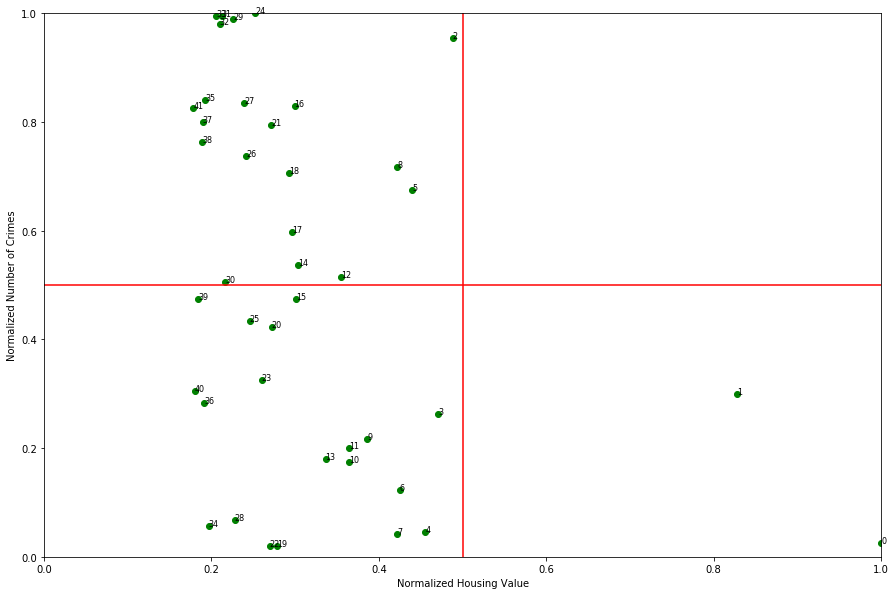

In [32]:
# Quadrant chart demonstrating the ranking of crimes and housing value of selected neighbourhood 

# Scatter plot with Assessed Value and Total crimes
types = df['Neighbourhood']
x_coords = df['Assessed Value']
y_coords = df['Total Crimes']
 
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='green')
    plt.text(x, y, i, fontsize=8)
    
# create vertical and horizontal line = 0.5
plt.axvline(0.5, color='r')
plt.axhline(0.5, color='r')

# set labels
plt.xlabel('Normalized Housing Value')
plt.ylabel('Normalized Number of Crimes')
plt.xlim(0,1)
plt.ylim(0,1)

plt.show()

######  Use Geopy Library To Get The Latitude And Longitude Values of Edmonton

In [39]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [40]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.



In [41]:
address = 'Edmonton, AB'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


###### Create A Map of Edmonton Shows the Neighhood With Great Property Value and Low Crime Rates

In [42]:
# create map of edmonton using latitude and longitude values
map_edmonton = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(Edmonton_data100['Latitude'], Edmonton_data100['Longitude'], Edmonton_data100['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_edmonton)  
    
map_edmonton

### Explore Edmonton

###### Acquire Informaiton on Neighborhood Venues in Edmonton

In [43]:
# Define foursqure credential
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UMNHLM411PJULFECQL5GRG5NCQBDUISBI3YKMTZ0CHVUFZPF
CLIENT_SECRET:CIA2JE1VO3JSPIOIR53IIBNE1VIPK0BV2DVJXX5WFGKFGVLL


In [44]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    
    

In [46]:
Edmonton_venues = getNearbyVenues( names=Edmonton_data100['Neighbourhood'],
                                   latitudes=Edmonton_data100['Latitude'],
                                   longitudes=Edmonton_data100['Longitude']
                                  )

WINDERMERE AREA
RURAL WEST BIG LAKE
WESTBROOK ESTATES
MILL CREEK RAVINE NORTH
ASTER
ANTHONY HENDAY RAMPART
WHITEMUD CREEK RAVINE NORTH
WHITEMUD CREEK RAVINE SOUTH
UNIVERSITY OF ALBERTA FARM
QUESNELL HEIGHTS
HAYS RIDGE AREA
RIVERVIEW AREA
GRANDVIEW HEIGHTS
MILL CREEK RAVINE SOUTH
DECOTEAU
HENDERSON ESTATES
CASHMAN
RURAL NORTH EAST SOUTH STURGEON
CAMERON HEIGHTS
BLACKMUD CREEK RAVINE
DONSDALE
BROOKSIDE
ANTHONY HENDAY LAKE DISTRICT
OGILVIE RIDGE
RHATIGAN RIDGE
WEDGEWOOD HEIGHTS
RIO TERRACE
WESTRIDGE
ANTHONY HENDAY ENERGY PARK
BULYEA HEIGHTS
CARTER CREST
POTTER GREENS
KINOKAMAU PLAINS AREA
BLUE QUILL ESTATES
RIVER'S EDGE
WEBBER GREENS
KESWICK AREA
GORMAN
FALCONER HEIGHTS
STARLING
HAWKS RIDGE
DECHENE


In [47]:
print(Edmonton_venues.shape)
Edmonton_venues.head()

(73, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MILL CREEK RAVINE NORTH,53.523396,-113.476045,Mill Creek Ravine,53.522402,-113.479923,Trail
1,MILL CREEK RAVINE NORTH,53.523396,-113.476045,Mill Creek Outdoor Pool,53.519652,-113.473878,Water Park
2,MILL CREEK RAVINE NORTH,53.523396,-113.476045,W.C. Tubby Bateman Park,53.522777,-113.479926,Park
3,MILL CREEK RAVINE NORTH,53.523396,-113.476045,Edmonton Plumber Co,53.526789,-113.479264,Home Service
4,WHITEMUD CREEK RAVINE NORTH,53.486929,-113.551503,Snow Valley Edmonton,53.483643,-113.556521,Ski Chalet


In [48]:
Edmonton_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
ANTHONY HENDAY LAKE DISTRICT,1,1,1,1,1,1
BLACKMUD CREEK RAVINE,3,3,3,3,3,3
BLUE QUILL ESTATES,3,3,3,3,3,3
BROOKSIDE,2,2,2,2,2,2
BULYEA HEIGHTS,5,5,5,5,5,5
DONSDALE,4,4,4,4,4,4
FALCONER HEIGHTS,18,18,18,18,18,18
GRANDVIEW HEIGHTS,1,1,1,1,1,1
HAWKS RIDGE,1,1,1,1,1,1


In [49]:
print('There are {} uniques categories.'.format(len(Edmonton_venues['Venue Category'].unique())))

There are 43 uniques categories.


###### Analyze Each Neighborhood

In [50]:
# one hot encoding
Edmonton_onehot = pd.get_dummies(Edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Edmonton_onehot['Neighbourhood'] = Edmonton_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Edmonton_onehot.columns[-1]] + list(Edmonton_onehot.columns[:-1])
Edmonton_onehot = Edmonton_onehot[fixed_columns]

Edmonton_onehot

,Neighbourhood,Asian Restaurant,Baby Store,Bakery,Butcher,Campground,Coffee Shop,Construction & Landscaping,Convenience Store,Dance Studio,...,Rest Area,Sandwich Place,Ski Chalet,Smoke Shop,Soccer Field,Spa,Steakhouse,Supermarket,Trail,Water Park
0,MILL CREEK RAVINE NORTH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,MILL CREEK RAVINE NORTH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,MILL CREEK RAVINE NORTH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MILL CREEK RAVINE NORTH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WHITEMUD CREEK RAVINE NORTH,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,FALCONER HEIGHTS,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,STARLING,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
70,STARLING,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
71,STARLING,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
Edmonton_onehot.shape

(73, 44)

In [52]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Edmonton_grouped = Edmonton_onehot.groupby('Neighbourhood').mean().reset_index()
Edmonton_grouped
Edmonton_grouped.shape

(21, 44)

In [53]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in Edmonton_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Edmonton_grouped[Edmonton_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ANTHONY HENDAY LAKE DISTRICT----
                     venue  freq
0  Health & Beauty Service   1.0
1         Asian Restaurant   0.0
2                Juice Bar   0.0
3            Movie Theater   0.0
4          Nature Preserve   0.0


----BLACKMUD CREEK RAVINE----
               venue  freq
0      Movie Theater  0.33
1  Convenience Store  0.33
2  Electronics Store  0.33
3          Rest Area  0.00
4    Nature Preserve  0.00


----BLUE QUILL ESTATES----
              venue  freq
0             Trail  0.67
1   Nature Preserve  0.33
2  Asian Restaurant  0.00
3               Pub  0.00
4     Movie Theater  0.00


----BROOKSIDE----
              venue  freq
0              Park   0.5
1      Soccer Field   0.5
2  Asian Restaurant   0.0
3               Pub   0.0
4     Movie Theater   0.0


----BULYEA HEIGHTS----
         venue  freq
0   Playground   0.4
1   Baby Store   0.2
2         Park   0.2
3  Pizza Place   0.2
4    Juice Bar   0.0


----DONSDALE----
                venue  freq
0  Italian R

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Edmonton_grouped['Neighbourhood']

for ind in np.arange(Edmonton_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Edmonton_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANTHONY HENDAY LAKE DISTRICT,Health & Beauty Service,Water Park,Electronics Store,Hockey Arena,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant,Event Service
1,BLACKMUD CREEK RAVINE,Electronics Store,Movie Theater,Convenience Store,Event Service,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
2,BLUE QUILL ESTATES,Trail,Nature Preserve,Home Service,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
3,BROOKSIDE,Soccer Field,Park,Water Park,Electronics Store,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
4,BULYEA HEIGHTS,Playground,Pizza Place,Baby Store,Park,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant


###### Cluster Neighborhoods

In [56]:
# set number of clusters
kclusters = 5

Edmonton_grouped_clustering = Edmonton_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edmonton_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 2, 1, 1, 2, 2, 3, 2, 1])

In [57]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Edmonton_merged1 = Edmonton_data100

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Edmonton_merged1 = Edmonton_merged1.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

Edmonton_merged1.head() # check the last columns!

,Neighbourhood,Assessed Value,Latitude,Longitude,Total Crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,WINDERMERE AREA,2.298667e+06,53.404547,-113.633278,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RURAL WEST BIG LAKE,1.903969e+06,53.579649,-113.679650,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WESTBROOK ESTATES,1.122334e+06,53.469766,-113.548718,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MILL CREEK RAVINE NORTH,1.082500e+06,53.523396,-113.476045,51,1.0,Water Park,Home Service,Park,Trail,Butcher,Campground,Hockey Arena,Health & Beauty Service,Gym,Golf Course
4,ASTER,1.047361e+06,53.450061,-113.355385,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
Edmonton_merged = Edmonton_merged1.dropna()
Edmonton_merged

,Neighbourhood,Assessed Value,Latitude,Longitude,Total Crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,MILL CREEK RAVINE NORTH,1.082500e+06,53.523396,-113.476045,51,1.0,Water Park,Home Service,Park,Trail,Butcher,Campground,Hockey Arena,Health & Beauty Service,Gym,Golf Course
6,WHITEMUD CREEK RAVINE NORTH,9.767500e+05,53.486929,-113.551503,24,2.0,Campground,Ski Chalet,Rest Area,Water Park,Electronics Store,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
12,GRANDVIEW HEIGHTS,8.149694e+05,53.500239,-113.549172,100,3.0,Construction & Landscaping,Water Park,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
13,MILL CREEK RAVINE SOUTH,7.729167e+05,53.511258,-113.468626,35,2.0,Hockey Arena,Trail,Butcher,Liquor Store,Smoke Shop,Event Service,Health & Beauty Service,Gym,Golf Course,Gas Station
15,HENDERSON ESTATES,6.923065e+05,53.467840,-113.598663,92,1.0,Park,Performing Arts Venue,Water Park,Home Service,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
17,RURAL NORTH EAST SOUTH STURGEON,6.804964e+05,53.626633,-113.335955,116,2.0,Golf Course,Garden Center,Water Park,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Gas Station,Fast Food Restaurant,Event Service
19,BLACKMUD CREEK RAVINE,6.400000e+05,53.445557,-113.515104,4,2.0,Electronics Store,Movie Theater,Convenience Store,Event Service,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
20,DONSDALE,6.256041e+05,53.485041,-113.637370,82,2.0,Italian Restaurant,Liquor Store,Coffee Shop,Pharmacy,Event Service,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
21,BROOKSIDE,6.229045e+05,53.491234,-113.566539,154,1.0,Soccer Field,Park,Water Park,Electronics Store,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
22,ANTHONY HENDAY LAKE DISTRICT,6.194706e+05,53.645768,-113.468261,4,4.0,Health & Beauty Service,Water Park,Electronics Store,Hockey Arena,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant,Event Service


In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Edmonton_merged['Latitude'], Edmonton_merged['Longitude'], Edmonton_merged['Neighbourhood'], Edmonton_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

###### Examine Clusters

In [60]:
# Cluster 1: discount stores 
Edmonton_merged.loc[Edmonton_merged['Cluster Labels'] == 0, Edmonton_merged.columns[[0] + list(range(5,Edmonton_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,WEBBER GREENS,0.0,Discount Store,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant,Event Service


In [61]:
# Cluster 2: parks, sports area, arts, grocery store 
Edmonton_merged.loc[Edmonton_merged['Cluster Labels'] == 1, Edmonton_merged.columns[[0] + list(range(5, Edmonton_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,MILL CREEK RAVINE NORTH,1.0,Water Park,Home Service,Park,Trail,Butcher,Campground,Hockey Arena,Health & Beauty Service,Gym,Golf Course
15,HENDERSON ESTATES,1.0,Park,Performing Arts Venue,Water Park,Home Service,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
21,BROOKSIDE,1.0,Soccer Field,Park,Water Park,Electronics Store,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
25,WEDGEWOOD HEIGHTS,1.0,Park,Water Park,Indian Restaurant,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
27,WESTRIDGE,1.0,Park,Event Service,Dance Studio,Water Park,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
29,BULYEA HEIGHTS,1.0,Playground,Pizza Place,Baby Store,Park,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant


In [62]:
# Cluster 3: parks, stores, restaurants
Edmonton_merged.loc[Edmonton_merged['Cluster Labels'] == 2, Edmonton_merged.columns[[0] + list(range(5, Edmonton_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,WHITEMUD CREEK RAVINE NORTH,2.0,Campground,Ski Chalet,Rest Area,Water Park,Electronics Store,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
13,MILL CREEK RAVINE SOUTH,2.0,Hockey Arena,Trail,Butcher,Liquor Store,Smoke Shop,Event Service,Health & Beauty Service,Gym,Golf Course,Gas Station
17,RURAL NORTH EAST SOUTH STURGEON,2.0,Golf Course,Garden Center,Water Park,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Gas Station,Fast Food Restaurant,Event Service
19,BLACKMUD CREEK RAVINE,2.0,Electronics Store,Movie Theater,Convenience Store,Event Service,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
20,DONSDALE,2.0,Italian Restaurant,Liquor Store,Coffee Shop,Pharmacy,Event Service,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center
26,RIO TERRACE,2.0,Pub,Coffee Shop,Park,Convenience Store,Water Park,Event Service,Health & Beauty Service,Gym,Golf Course,Gas Station
31,POTTER GREENS,2.0,Steakhouse,Coffee Shop,Gas Station,Convenience Store,Water Park,Event Service,Hockey Arena,Health & Beauty Service,Gym,Golf Course
32,KINOKAMAU PLAINS AREA,2.0,Home Service,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant,Event Service
33,BLUE QUILL ESTATES,2.0,Trail,Nature Preserve,Home Service,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
38,FALCONER HEIGHTS,2.0,Asian Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Bakery,Gym,Indian Restaurant,Juice Bar,Liquor Store,Pet Store


In [63]:
# Cluster 4: construction, landscaping, SPA
Edmonton_merged.loc[Edmonton_merged['Cluster Labels'] == 3, Edmonton_merged.columns[[0] + list(range(5, Edmonton_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,GRANDVIEW HEIGHTS,3.0,Construction & Landscaping,Water Park,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant
39,STARLING,3.0,Construction & Landscaping,Spa,Water Park,Electronics Store,Hockey Arena,Health & Beauty Service,Gym,Golf Course,Gas Station,Garden Center


In [64]:
# Cluster 5 : Health & Beauty Service 
Edmonton_merged.loc[Edmonton_merged['Cluster Labels'] == 4, Edmonton_merged.columns[[0] + list(range(5, Edmonton_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,ANTHONY HENDAY LAKE DISTRICT,4.0,Health & Beauty Service,Water Park,Electronics Store,Hockey Arena,Gym,Golf Course,Gas Station,Garden Center,Fast Food Restaurant,Event Service
